<a href="https://colab.research.google.com/github/Kamran0153/Autoregressive-Model-Exp/blob/main/AR(p)InferenceError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

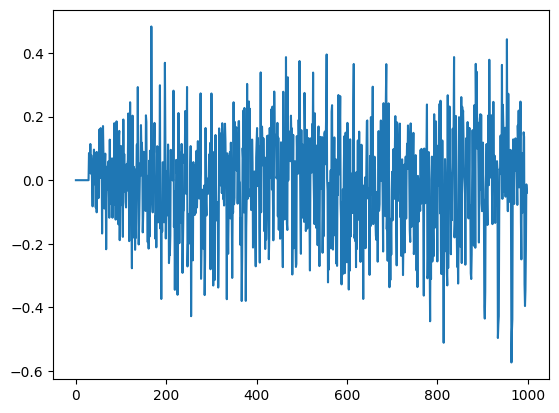

In [53]:
from pandas._libs.tslibs.nattype import NaT
import numpy as np
from scipy.special import jv
#x_t=a_1 x_{t-1}+ a_p x_{t-p}+w
#y_t=x_t+N
# We need to predict y_t by using x_{t-\delta}
sample=1000000
x=np.zeros(sample)
y=np.zeros(sample)
p=30
a=np.zeros(p)
a[0]=0.1 #AR-coefficient a_1
a[p-1]=0.8 #AR-coefficient a_p
w=0.01 #noise variance
N=0.001 # noise variance

for i in range(p):
  x[i]=0
  y[i]=x[0]+np.random.normal(0, np.sqrt(N))
for i in range(p,sample):
  x[i]=a[0]*x[i-1]+a[p-1]*x[i-p]+np.random.normal(0, np.sqrt(w))
  y[i]=x[i]+np.random.normal(0, np.sqrt(N))
import matplotlib.pyplot as plt
plt.plot(x[1:1000])


# Autocorrelation Coefficient

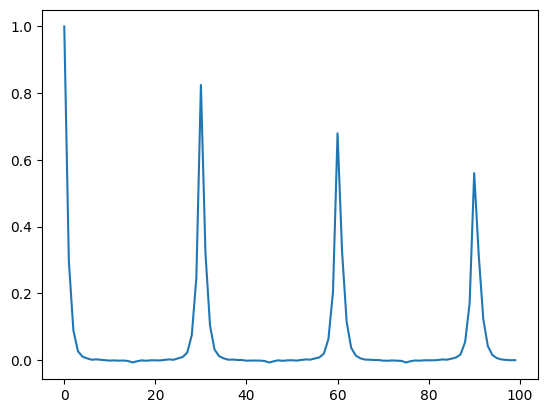

In [54]:
import pandas as pd
s = pd.Series(x)
rho=[]
age=[]
Range=100
for k in range(0,Range):
   rho.append(s.autocorr(lag=k))
   age.append(k)
plt.plot(age, rho)

# MMSE

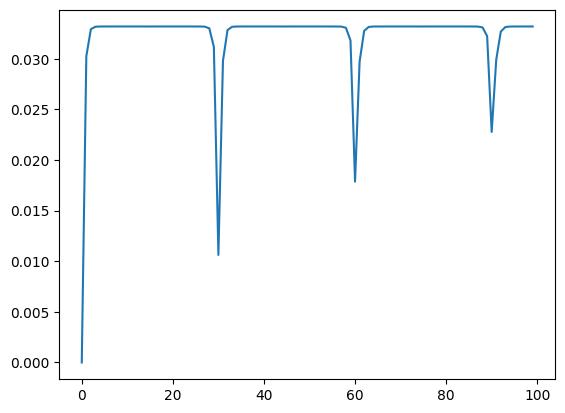

In [55]:
error=np.zeros(len(age))
for k in range(Range):
  error[k]=(1-rho[k]**2)*np.var(y)
plt.plot(age,error)

In [56]:
error

array([0.        , 0.03026289, 0.03293569, 0.03317684, 0.03319631,
       0.03319889, 0.03319968, 0.03319956, 0.03319969, 0.03319968,
       0.03319958, 0.03319964, 0.03319955, 0.03319962, 0.03319938,
       0.03319788, 0.03319924, 0.03319965, 0.03319952, 0.03319966,
       0.03319966, 0.03319964, 0.03319969, 0.03319959, 0.03319968,
       0.03319889, 0.0331971 , 0.03318314, 0.0330157 , 0.03118446,
       0.01062773, 0.02979479, 0.03284587, 0.03316753, 0.03319524,
       0.03319889, 0.03319967, 0.03319963, 0.03319969, 0.03319969,
       0.03319956, 0.0331996 , 0.03319961, 0.03319958, 0.03319937,
       0.03319785, 0.03319921, 0.03319966, 0.03319949, 0.03319966,
       0.03319967, 0.03319958, 0.03319969, 0.03319961, 0.03319966,
       0.03319903, 0.03319769, 0.03318755, 0.03306832, 0.03181414,
       0.01787048, 0.02972261, 0.03276683, 0.03315603, 0.03319379,
       0.03319886, 0.03319964, 0.03319967, 0.03319969, 0.03319969,
       0.03319958, 0.03319952, 0.03319964, 0.03319955, 0.03319